### kmeans聚类弊端图

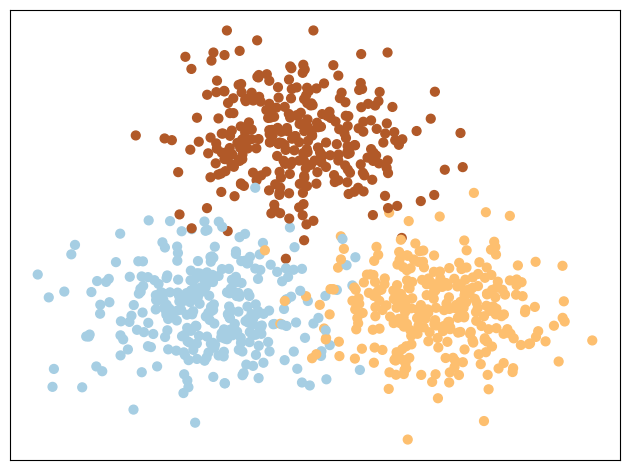

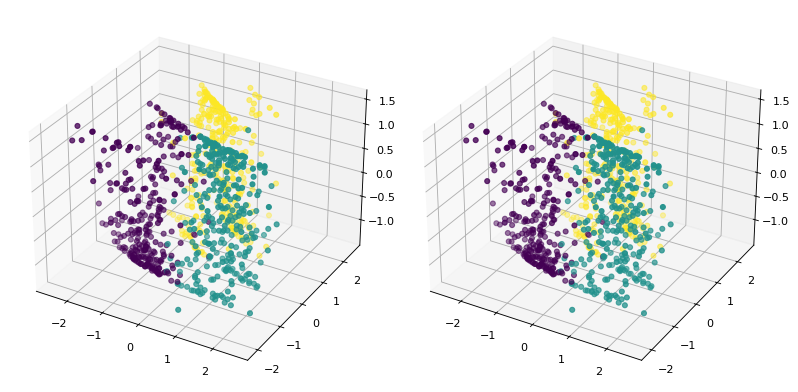

ARI without noise:  0.9123928340359085
ARI with noise:  0.719207887206982


In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score


def make_data():
    np.random.seed(100)
    centers = [[2.5, 1], [3.8, 1], [3, 2.5]]  # 指定簇中心
    x, y = make_blobs(n_samples=900, centers=centers, cluster_std=0.35, random_state=200)
    noise = np.reshape(np.sin(2 * x[:, 0] * x[:, 1]), [-1, 1])

    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Paired)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()
    x_noise = np.hstack([x, noise])
    ss = StandardScaler()
    x_noise = ss.fit_transform(x_noise)
    return x, y, x_noise


def visualization(x, y, x_noise):
    fig = plt.figure(figsize=(10, 5), dpi=80)
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(x_noise[:, 0], x_noise[:, 1], x_noise[:, 2], c=y)
    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(x_noise[:, 0], x_noise[:, 1], x_noise[:, 2], c=y)
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    x, y, x_noise = make_data()
    visualization(x, y, x_noise)
    model = KMeans(n_clusters=3, random_state=20)
    model.fit(x)
    y_pred = model.predict(x)
    ARI = adjusted_rand_score(y, y_pred)
    print("ARI without noise: ", ARI)

    model.fit(x_noise)
    y_pred = model.predict(x_noise)
    ARI = adjusted_rand_score(y, y_pred)
    print("ARI with noise: ", ARI)
